### Testing if TF is working

In [1]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [2]:
import keras

Using TensorFlow backend.


In [5]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 9s 2us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

## Below shows the Fasion_mnist dataset and the labels used

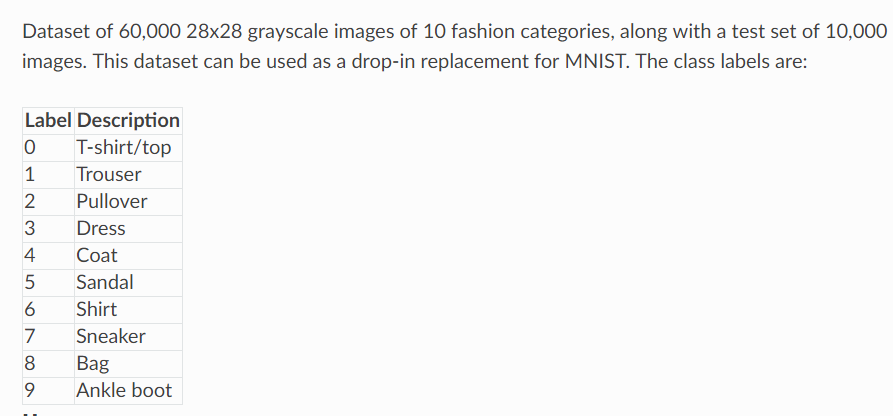

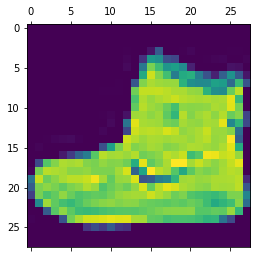

In [9]:
plt.matshow(x_train[0])

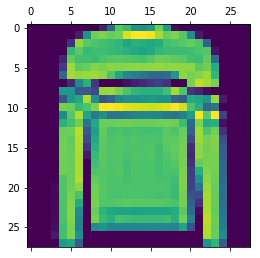

In [12]:
plt.matshow(x_train[5])

In [13]:
y_train[5]

2

Normalising the values from 0 to 1

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train.shape[0]

60000

In [17]:
from keras.models import Sequential
from keras.layers import Dense,Activation, Flatten

In [23]:
model = Sequential()

Flatten causes the imput array to be flattened into a 1-D array , the alternative method is to reshape before putting into the model

In [24]:
#this is the input layer
model.add(Flatten(input_shape=[28,28]))
# Dense is the hidden layer
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='softmax'))
# 10 output because there are 10 possible output, softmax is used because it 
#normalises output into a probability distribution

Instructions for updating:
Colocations handled automatically by placer.


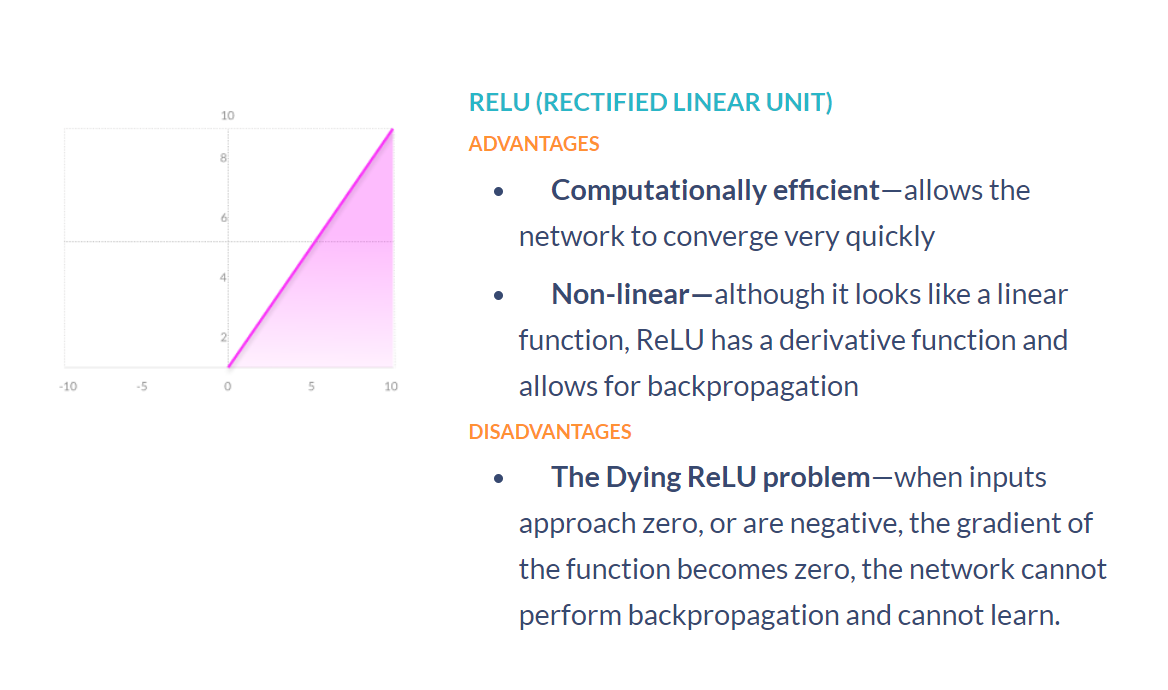

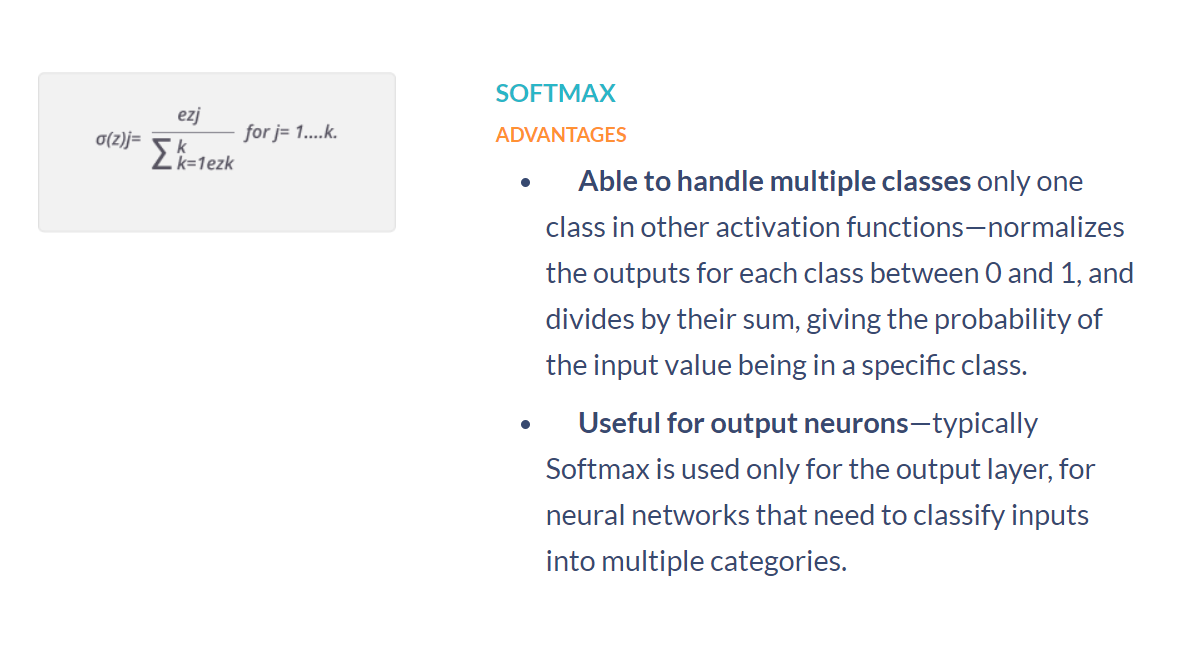

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


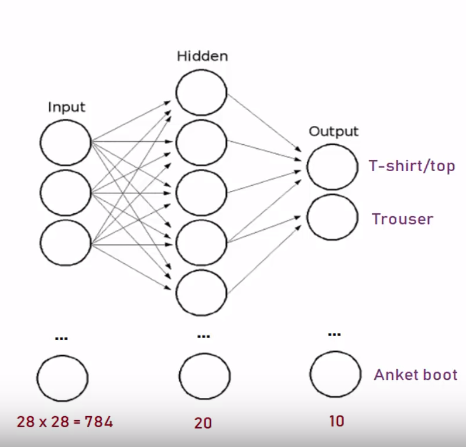

In [26]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
              metrics=['accuracy'])

In [28]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.4409 - acc: 0.8471
Epoch 2/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.4142 - acc: 0.8545
Epoch 3/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.3978 - acc: 0.8614
Epoch 4/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.3849 - acc: 0.8639
Epoch 5/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.3760 - acc: 0.8688


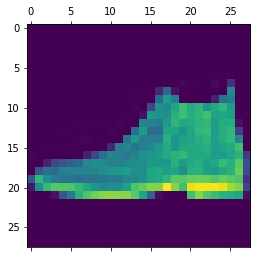

In [29]:
plt.matshow(x_test[0])

In [31]:
x_test.shape

(10000, 28, 28)

In [32]:
y_pred = model.predict(x_test)

### remember we use the softmax function so it gives us a probability of the possible classifications, so we want to know which prob is the highest 

In [34]:
y_pred[0]

array([1.17016025e-04, 1.56938981e-07, 5.95224583e-06, 1.01964979e-05,
       3.02690614e-06, 2.32123867e-01, 8.08784316e-05, 9.20640230e-02,
       8.96629412e-03, 6.66628599e-01], dtype=float32)

In [35]:
np.argmax(y_pred[0])

9

Hence we know that the prob of it being the ankle boot is the highest

In [36]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 40us/step


[0.4182278692960739, 0.8541]

first var is the loss value, 2nd is the accuracy